In [2]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import os

import tensorflow as tf
from im2txt import configuration
from im2txt import inference_wrapper
from im2txt.inference_utils import caption_generator
from im2txt.inference_utils import vocabulary
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# 训练好的模型存放路径
checkpoint_path = "./model/model.ckpt-3000000"
# 词汇表
vocab_file = "./im2txt/data/word_counts.txt"
# 图片路径
input_files = "./images/"

INFO:tensorflow:Building model.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
INFO:tensorflow:Initializing vocabulary from file: ./im2txt/data/word_counts.txt
INFO:tensorflow:Created vocabulary with 11520 words
INFO:tensorflow:Loading model from checkpoint: ./model/model.ckpt-3000000
INFO:tensorflow:Restoring parameters from ./model/model.ckpt-3000000
INFO:tensorflow:Successfully loaded checkpoint: model.ckpt-3000000
./images/COCO_val2014_000000224477.jpg
Instructions for updating:
Use tf.gfile.GFile.
  0) a man riding a wave on top of a surfboard . (p=0.038242)
  1) a person riding a surf board on a wave (p=0.015098)
  2) a man riding a wave on a surfboard in the ocean . (p=0.005006)


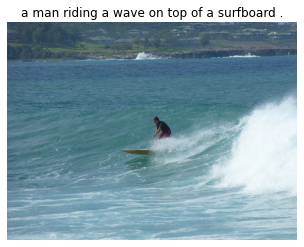

./images/u=3439519203,1780219164&fm=26&gp=0.jpg
  0) a woman standing on a sidewalk holding a pink umbrella . (p=0.000046)
  1) a woman standing on a sidewalk holding a cell phone . (p=0.000045)
  2) a woman standing on a sidewalk next to a man . (p=0.000016)


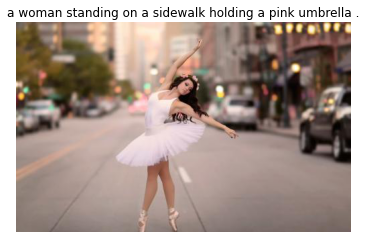

./images/1.jpeg
  0) a close up of a cat laying on a couch (p=0.004082)
  1) a close up of a cat laying on a bed (p=0.002361)
  2) a cat laying on top of a couch next to a stuffed animal . (p=0.000108)


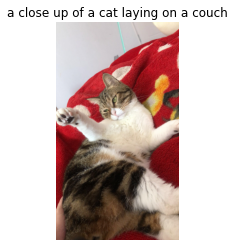

./images/5a547c07c67d6.jpg
  0) a person on a surfboard in the water . (p=0.000195)
  1) a person standing on a beach next to the ocean . (p=0.000165)
  2) a person on a surfboard in the water (p=0.000079)


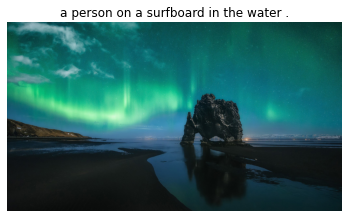

./images/img20.jpg
  0) a couple of birds that are standing in the water . (p=0.000533)
  1) a couple of birds that are standing in some water (p=0.000393)
  2) a couple of birds that are standing in the grass . (p=0.000318)


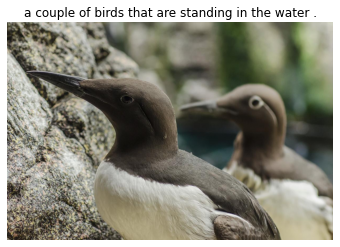

./images/a686c9177f3e6709a4a536d031c79f3df8dc5573.jpg
  0) a young boy kicking a soccer ball on a field . (p=0.005146)
  1) a young man kicking a soccer ball on a field . (p=0.004937)
  2) a young boy kicking a soccer ball around a field . (p=0.002299)


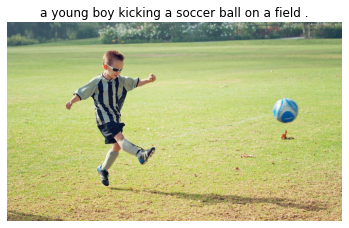

In [4]:
# 载入训练好的模型
g = tf.Graph()
with g.as_default():
    model = inference_wrapper.InferenceWrapper()
    restore_fn = model.build_graph_from_config(configuration.ModelConfig(), checkpoint_path)

# 载入词表
vocab = vocabulary.Vocabulary(vocab_file)

with tf.Session(graph=g) as sess:
    # 载入训练好的模型
    restore_fn(sess)
    generator = caption_generator.CaptionGenerator(model, vocab)
         
    # 循环文件夹
    for root,dirs,files in os.walk(input_files):
        for file in files:
            # 打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            # 载入图片
            image = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()   
            # 获得图片描述
            captions = generator.beam_search(sess, image)
            # 打印多个标题
            for i, caption in enumerate(captions):
                sentence = [vocab.id_to_word(w) for w in caption.sentence[1:-1]]
                sentence = " ".join(sentence)
                if i == 0:
                    title = sentence
                print("  %d) %s (p=%f)" % (i, sentence, math.exp(caption.logprob)))

            # 显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
            plt.show()